https://numpy.org/doc/stable/reference/index.html

https://docs.scipy.org/doc/scipy-0.9.0/reference/ndimage.html

https://medium.com/nuances-of-programming/5-%D0%BF%D1%80%D0%BE%D1%81%D1%82%D1%8B%D1%85-%D1%81%D0%BF%D0%BE%D1%81%D0%BE%D0%B1%D0%BE%D0%B2-%D0%B2%D0%B8%D0%B7%D1%83%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D0%B8-%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85-%D0%BD%D0%B0-python-%D1%81-%D0%BA%D0%BE%D0%B4%D0%BE%D0%BC-e0053808c83d

## Фильтрация

Исполнитель:

In [1]:
#Загрузка библиотек
import numpy as np
import matplotlib.pyplot as plt
#from matplotlib.colors import ListedColormap

%matplotlib inline

In [2]:
#Вспомогательные функции

# Гистограмма распределения данных каналов. Для оси y используется логарифмическая шкала
# val - массива данных двух каналов
# title - подпись к графикам каждого из каналов
def show_hist(val, title):
    plt.figure(figsize=(10, 5))
    hist, bins = np.histogram(val, bins=50)
    width = 0.7 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    plt.bar(center, hist, align='center', width=width)
    plt.xlabel(title)    
    plt.yscale('log')
    plt.show()
    
    
# Вывод данных в виде изображения
# data - массив данных
# title - подпись к изоюражению
# size - размер подложки
def show_img(data, title, size = 15, cmap = plt.cm.cividis):
    plt.figure(figsize=(size, size))
    plt.imshow(data, cmap = cmap) #cividis #tab20c
    plt.xlabel(title)
    plt.show()

    
def show_gray(data, title ="", size = 10):
    plt.figure(figsize=(size, size))
    plt.imshow(data, cmap=plt.cm.gray)
    plt.xlabel(title)
    #plt.colorbar()
    plt.show()

## Цифровые фильтры

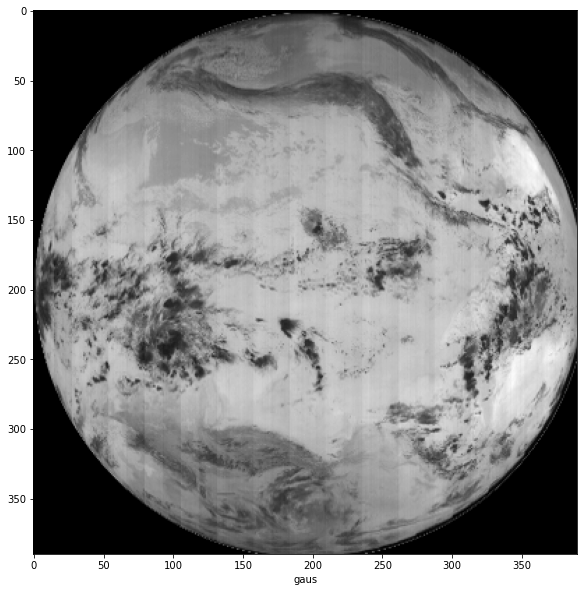

In [3]:
import scipy.ndimage.filters as sc
import matplotlib.image as mpimg

#Чтение изображения из файла
img = mpimg.imread('../Electro2.png');


# В виде изображения
show_gray(img, "gaus", 10)

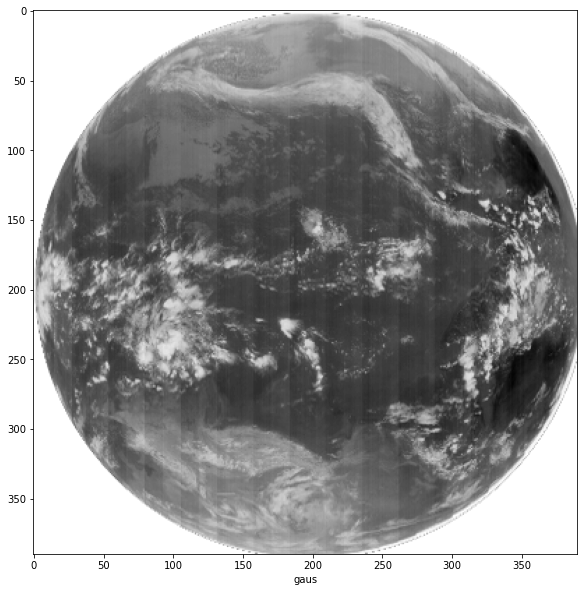

In [4]:
#Создание негатива изображения

#TODO Задайте фильтр размером 3x3
f = np.array([[0, 0, 0], 
              [0, -1, 0], 
              [0, 0, 0]]);

#TODO Примените фильтр к изображению и выведите результат (см. вспомогательные функции в начале файла)
res = sc.convolve(img, f)
show_gray(res, "gaus", 10)


При высокочастотной фильтрации заметно повышение четкости границ и усиление других контуров. 
Вместе с тем высокочастотная фильтрация гасит низкие частоты и отфильтрованное изображение теряет 
большую часть фоновой тональности, имевшуюся на исходном изображении


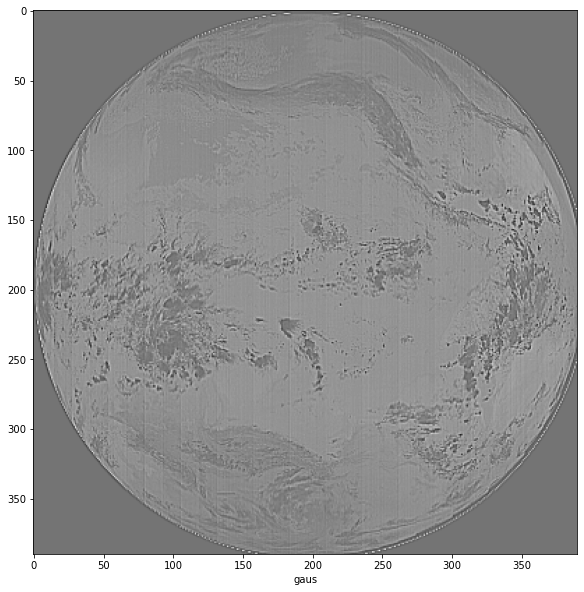

In [5]:
# Пространственный фильтр верхних частот

#TODO Задайте фильтр размером 3x3
f = np.array([[-1, -1, -1],
              [-1,  9, -1],
              [-1, -1, -1]])

#TODO Примените фильтр к изображению и выведите результат
res = sc.convolve(img, f)
show_gray(res, "gaus", 10)

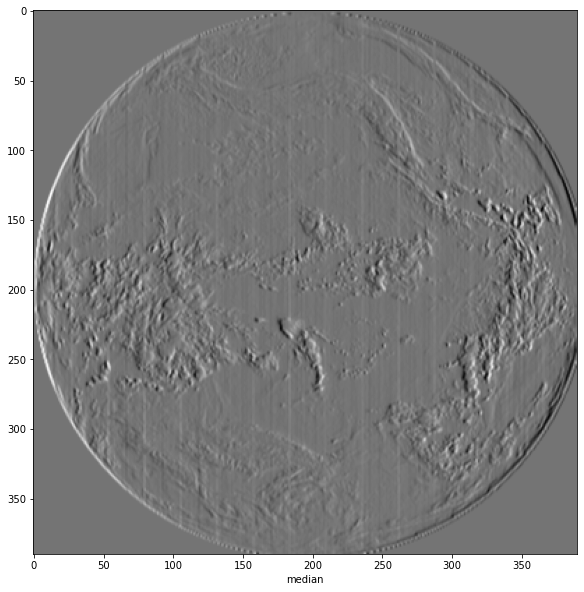

In [6]:
#TODO Используйте встроенную функцию фильтра Собеля и выведите результат
res = sc.sobel(img)
show_gray(res, 'median', 10)

При низкочастотной фильтрации расфокусировка изображения, позволяющая создать грубый образ объектов, 
которые могут представлять интерес. При этом интенсивность мелких объектов смешивается с фоном, 
в то время как большие объекты остаются в виде пятен и могут быть легко обнаружены. 

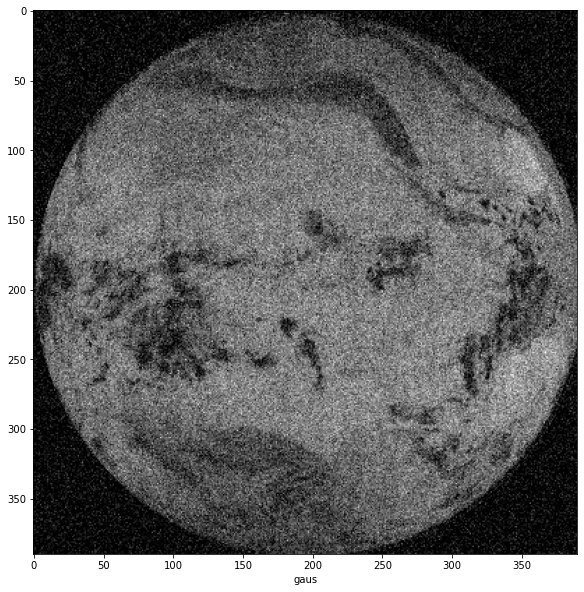

In [7]:
img = mpimg.imread('../Electro2_gaus.png');

# В виде изображения
show_gray(img, "gaus", 10)

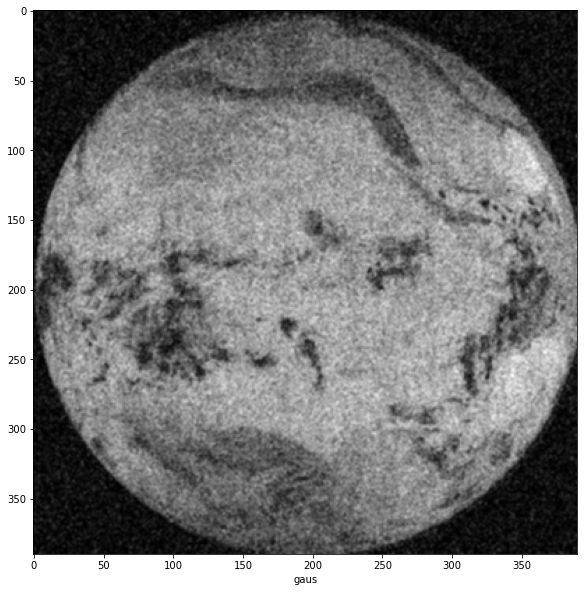

In [8]:

#Пространственный фильтр нижних частот. Фильтр Гаусса

#TODO Задайте фильтр размером 3x3
f = (1/16.0) * np.array([[1, 2, 1], 
                         [2, 4, 2], 
                         [1, 2, 1]]);

#TODO Примените фильтр к изображению
res = sc.convolve(img, f)

#TODO Выведите результат в виде изображения 
show_gray(res, "gaus", 10)

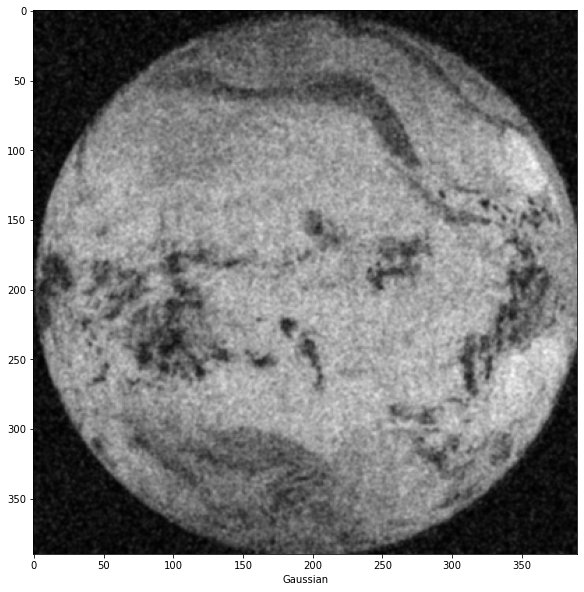

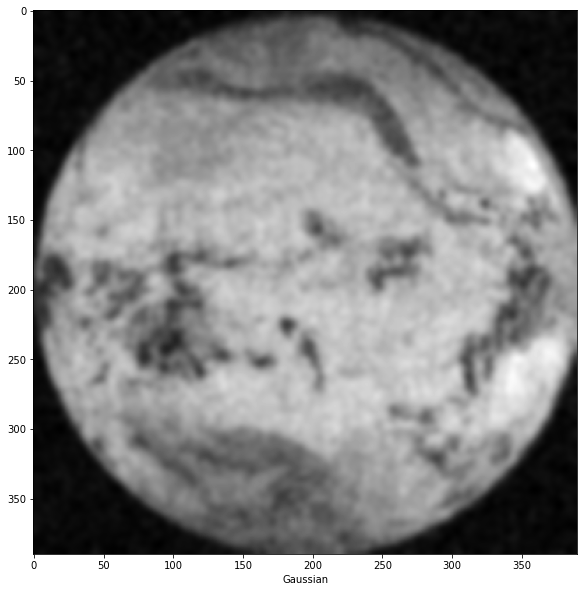

In [9]:
#TODO Используйте встроенную функцию фильтра Гаусса с СКО = 0.9
res = sc.gaussian_filter(img, 0.9)
show_gray(res, r'Gaussian', 10)

#TODO Используйте встроенную функцию фильтра Гаусса с СКО = 2.5
res = sc.gaussian_filter(img, 2.5)
show_gray(res, r'Gaussian', 10)

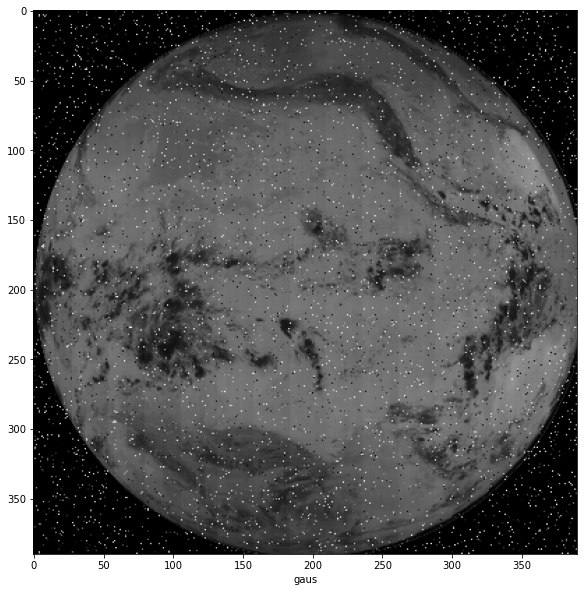

In [10]:
img = mpimg.imread('../Electro2_sp.png');

# В виде изображения
show_gray(img, "gaus", 10)

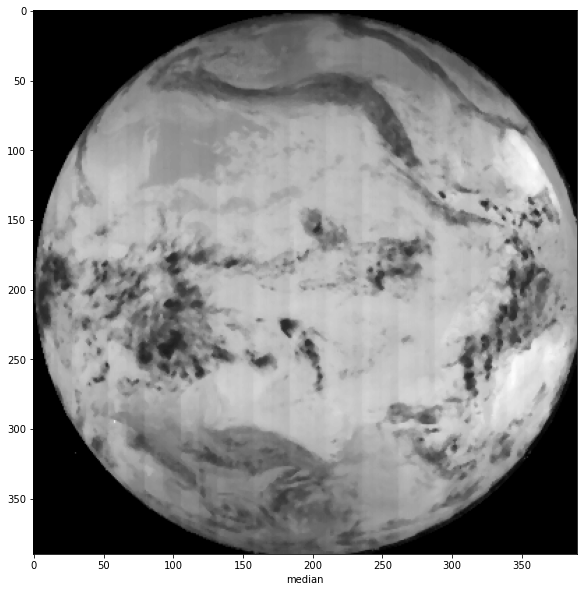

In [11]:
#TODO Используйте встроенную функцию медианного фильтра и выведите результат
res = sc.median_filter(img, 3)
show_gray(res, 'median', 10)

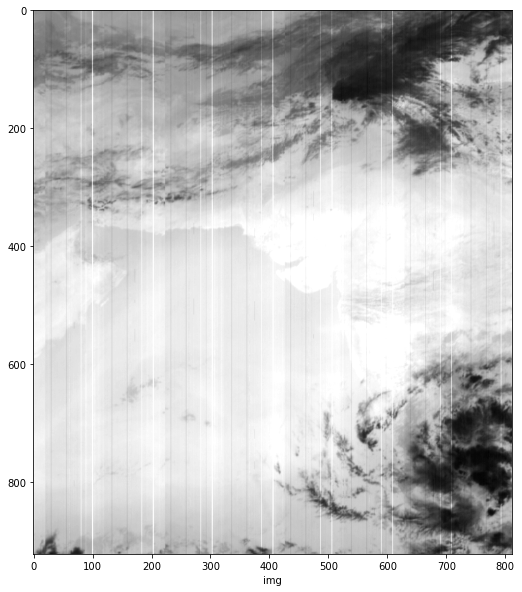

In [12]:
img = mpimg.imread('../_GOMS-3_06_sm2.bmp');

# В виде изображения
show_gray(img, "img", 10)

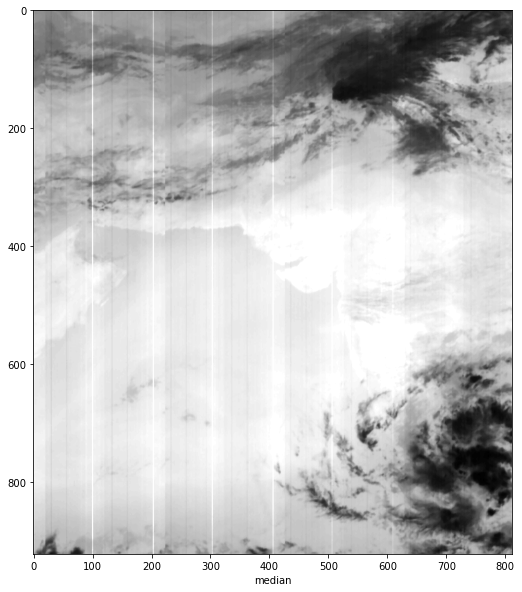

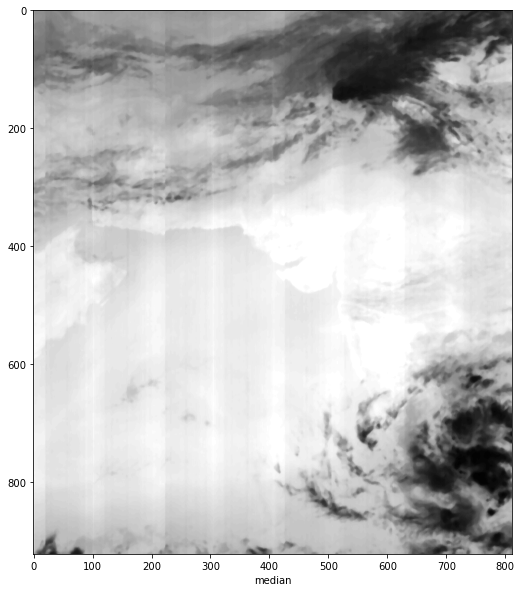

In [13]:
res = sc.median_filter(img, 3)
show_gray(res, 'median', 10)

res = sc.median_filter(img, 5)
show_gray(res, 'median', 10)

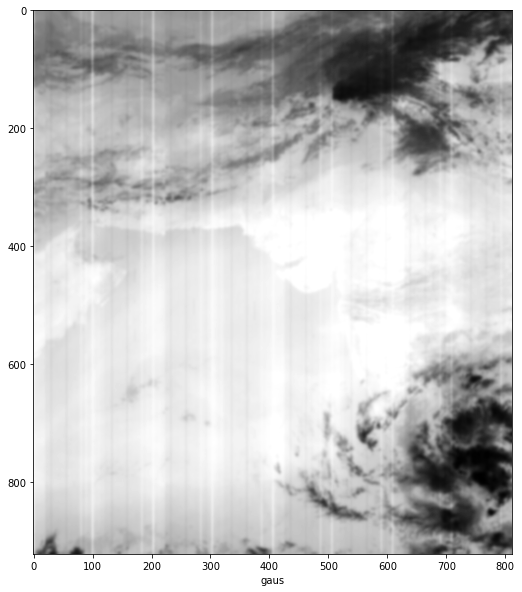

In [14]:
res = sc.gaussian_filter(img, 1.9)
show_gray(res, 'gaus', 10)

In [15]:
import cv2

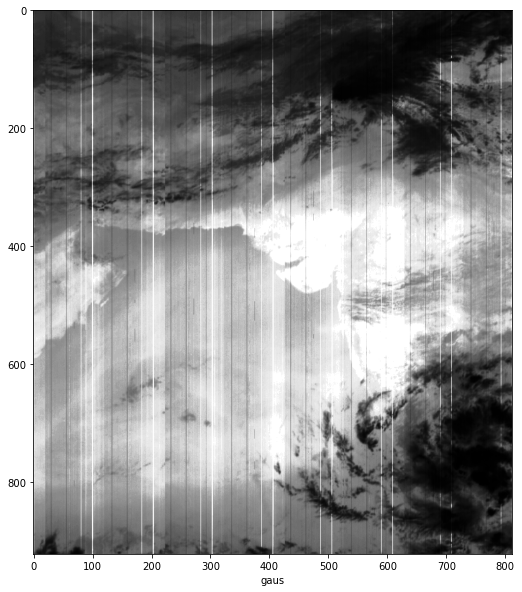

In [16]:
res = cv2.equalizeHist(img)
show_gray(res, 'gaus', 10)

In [17]:
import cv2
import numpy as np

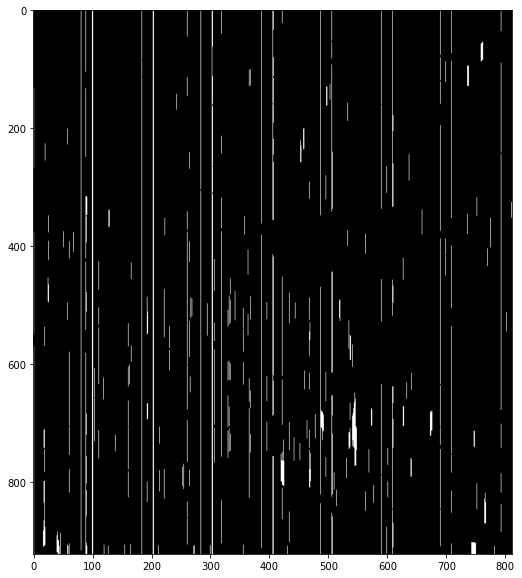

In [18]:


gray = img #cv2.equalizeHist(img)
bw = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 15, -2)

white_strips = np.copy(bw)

cols = white_strips.shape[1]
strips_size = cols // 30

stripStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (1, strips_size))

white_strips = cv2.erode(white_strips, stripStructure)
white_strips = cv2.dilate(white_strips, stripStructure)


show_gray(white_strips)

In [19]:
# Создаем копию изображения
img_clear = img.copy()
# Создаем маску в исходном изображении, соответствующую white_strips
img = np.ma.MaskedArray(img, white_strips > 10)

In [20]:
# Определяем индексы массива, соответствующие белым полосам на исходном изображении, для применения к ним фильтра
idx = np.argwhere(white_strips > 10)

for x, y in idx :
    #Выделяем участок исходного изображения (окно), центр которого соответствует координатам 
    #зашумленного пикселя (x,y), принадлежащего белой полосе
    slice = img[max(0, x-3):x+3, max(0,y-3):y+3] # квадрат 7x7
    #Для определения нового значения используем только незашумленные пиксели
    slice_fl = np.ma.compressed(slice).flatten()
    if (slice_fl.size != 0):
        #Определяем медиану выбранных пикселей. Присваиваем центральному новое значение.
        img_clear[x,y] = np.median(slice_fl)  

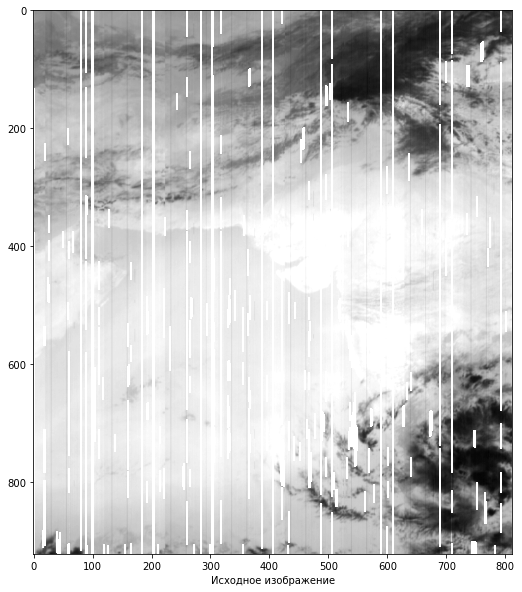

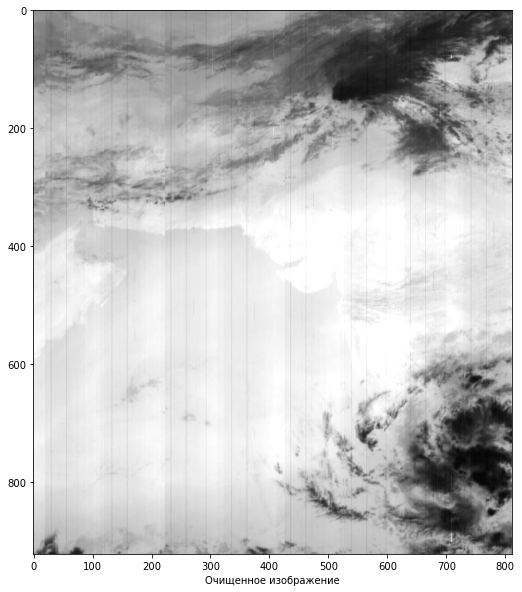

In [21]:
show_gray(img, "Исходное изображение")
show_gray(img_clear, "Очищенное изображение")

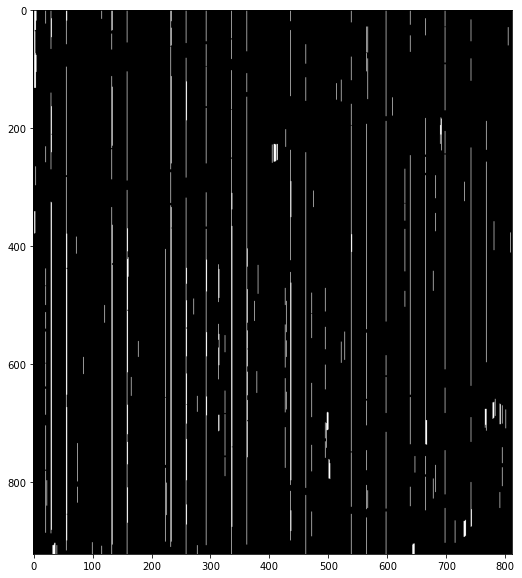

In [22]:
gray = cv2.bitwise_not(img_clear)
bw = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 15, -2)

dark_strips = np.copy(bw)

cols = dark_strips.shape[1]
strips_size = cols // 30

stripStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (1, strips_size))

dark_strips = cv2.erode(dark_strips, stripStructure)
dark_strips = cv2.dilate(dark_strips, stripStructure)


show_gray(dark_strips)

In [23]:
idx = np.argwhere(dark_strips > 10)
img = np.ma.MaskedArray(img, dark_strips > 10)

   
    
for x, y in idx :
    #Выделяем участок исходного изображения (окно), центр которого соответствует координатам 
    #зашумленного пикселя (x,y), принадлежащего белой полосе
    slice = img[max(0, x-3):x+3, max(0,y-3):y+3] # квадрат 7x7
    #Для определения нового значения используем только незашумленные пиксели
    slice_fl = np.ma.compressed(slice).flatten()
    if (slice_fl.size != 0):
        #Определяем медиану выбранных пикселей. Присваиваем центральному новое значение.
        img_clear[x,y] = np.median(slice_fl) 

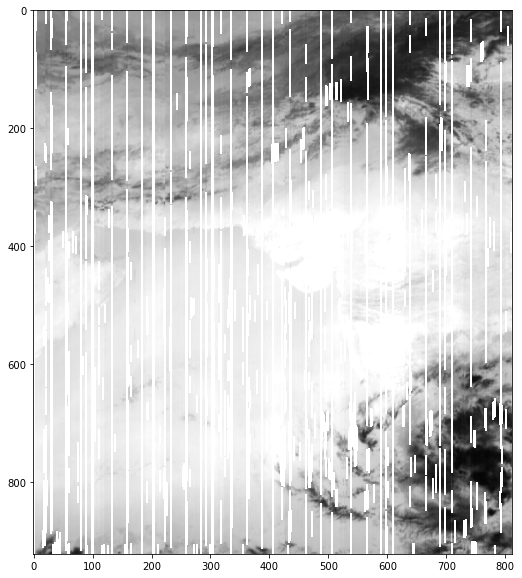

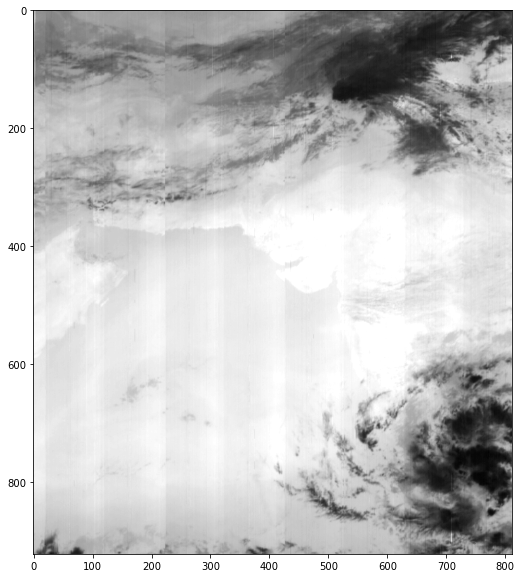

In [24]:
show_gray(img)
show_gray(img_clear)